# Social Media Content Reaction Analysis 

## Data Import and Cleaning

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing data
Content_df= pd.read_csv("/kaggle/input/a360-internship-practice/Content.csv")
Reactions_df= pd.read_csv("/kaggle/input/a360-internship-practice/Reactions.csv")
Reaction_Types_df= pd.read_csv("/kaggle/input/a360-internship-practice/ReactionTypes.csv")

In [3]:
Content_df.head(1)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...


In [4]:
#Reviewing the shape, nulls, and duplicates for the Content_df dataframe

print(Content_df.shape)
print(Content_df.isnull().sum())
print(Content_df.dtypes)
print(Content_df.duplicated().sum())


(1000, 6)
Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64
Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object
0


In [5]:
#Remove unwanted columns
Content_df= Content_df.drop(columns=['Unnamed: 0','URL'])

#Rename Type Column For Clarity
Content_df= Content_df.rename(columns={'Type': 'Content Type'})

#Making Category values uniform
Content_df['Category']= Content_df['Category'].str.replace('"', '').str.capitalize()

In [6]:
Content_df.head(1)

,Content ID,User ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying


In [7]:
Reactions_df.head(1)


,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15


In [8]:
#Reviewing the shape, nulls, and duplicates for the Reactions_df dataframe
print(Reactions_df.shape)
print(Reactions_df.isnull().sum())
print(Reactions_df.dtypes)
print(Reactions_df.duplicated().sum())

(25553, 5)
Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64
Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object
0


In [9]:
#remove unwanted columns
Reactions_df= Reactions_df.drop(columns=['Unnamed: 0','User ID'])

#Rename Type Column For Clarity
Reactions_df= Reactions_df.rename(columns={'Type': 'Reaction Type'})



In [10]:
#remove rows with missing values
Reactions_df = Reactions_df.dropna()

In [11]:
Reactions_df.head(1)

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50


In [12]:
Reaction_Types_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [13]:
#Reviewing the shape, nulls, and duplicates for the Reaction_Types_df dataframe

print(Reaction_Types_df.shape)
print(Reaction_Types_df.isnull().sum())
print(Reaction_Types_df.dtypes)
print(Reaction_Types_df.duplicated().sum())

(16, 4)
Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64
Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object
0


In [14]:
#remove unwanted columns
Reaction_Types_df= Reaction_Types_df.drop(columns='Unnamed: 0')

#Rename Type Column For Clarity
Reaction_Types_df= Reaction_Types_df.rename(columns={'Type': 'Reaction Type'})

In [15]:
Reaction_Types_df.head(1)

,Reaction Type,Sentiment,Score
0,heart,positive,60


In [16]:
#Merge all 3 dataframes

Content_merged = pd.merge(Reactions_df, Content_df, on='Content ID')
Content_Data_Final = pd.merge(Content_merged, Reaction_Types_df, on='Reaction Type')

In [17]:
Content_Data_Final.head(5)

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,Healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,Healthy eating,negative,0


In [18]:
category_scores = Content_Data_Final.groupby('Category')['Score'].sum()

# Sort the scores in descending order and get the top 5
top_categories = category_scores.sort_values(ascending=False)[:5]

#new dataframe
Top_Categories_df = pd.DataFrame({'Category': top_categories.index, 'Score': top_categories.values})


In [19]:
#export data to a spreadsheet 

with pd.ExcelWriter('data_final.xlsx') as writer:
    Content_Data_Final.to_excel(writer, sheet_name='Content_Data_Final')
    Top_Categories_df.to_excel(writer, sheet_name='Top_Categories_df')

## Exploratory Analysis and Visualization

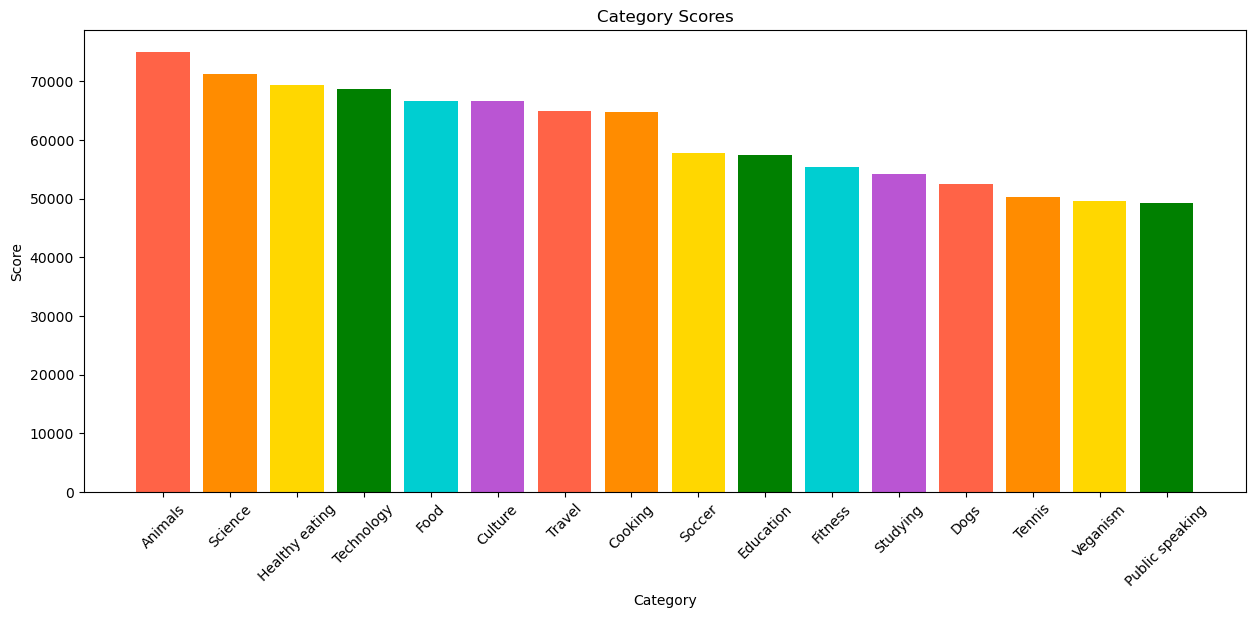

In [20]:
# Sort the scores in descending order
sorted_scores = category_scores.sort_values(ascending=False)

colors = ['tomato', 'darkorange', 'gold', 'green', 'darkturquoise','mediumorchid']

#bar chart of the scores for each category with a larger figure size and multicolored bars
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(sorted_scores.index, sorted_scores, color= colors)

#labels
ax.set_title('Category Scores')
ax.set_xlabel('Category')
ax.set_ylabel('Score')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

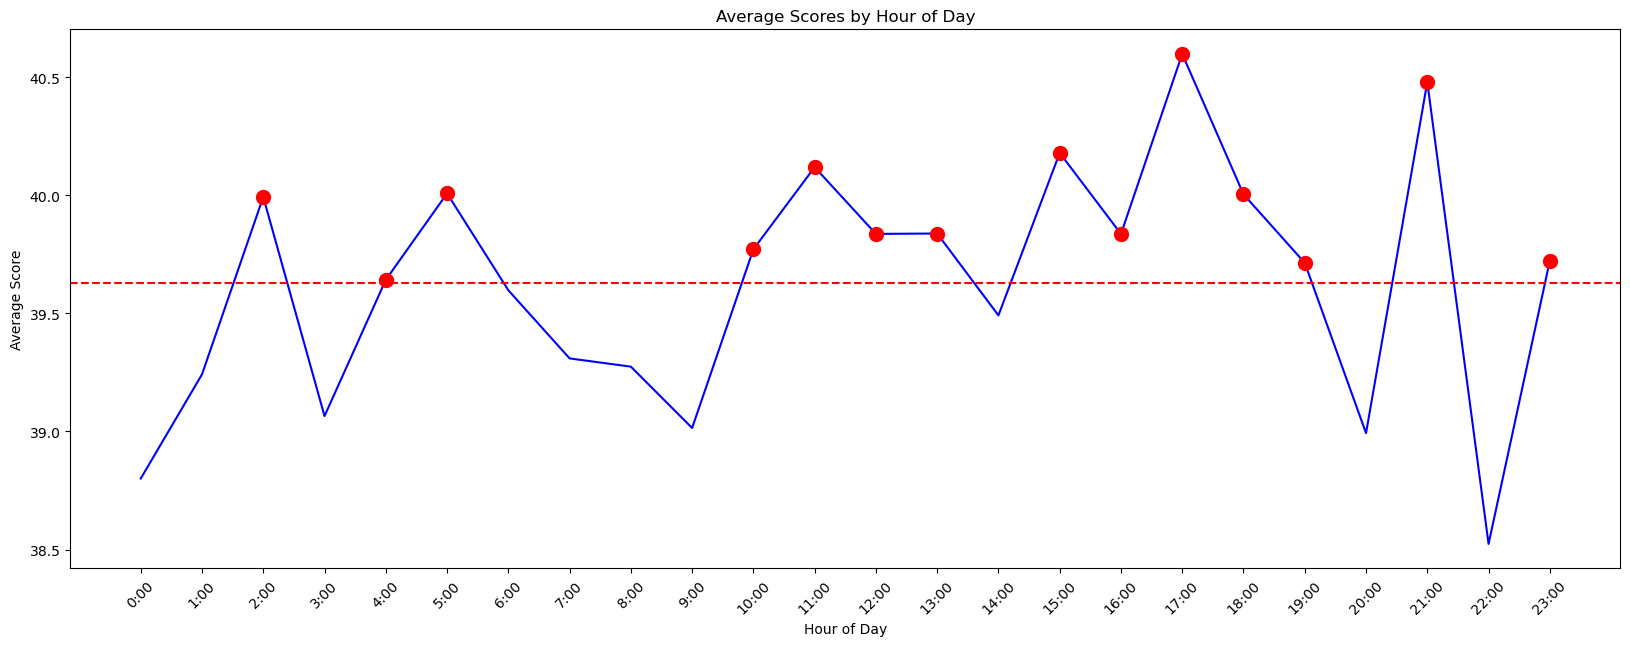

In [21]:
# Convert the "Datetime" column to a datetime object
Content_Data_Final['Datetime'] = pd.to_datetime(Content_Data_Final['Datetime'], format='%Y-%m-%d %H:%M:%S')

# average score per hour
hourly_scores = Content_Data_Final.groupby(Content_Data_Final['Datetime'].dt.hour)['Score'].mean()

# Find peak hours
peak_hours = hourly_scores[hourly_scores > hourly_scores.mean()].index

# Create line chart of hourly scores
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(hourly_scores.index, hourly_scores, color='b')

# dashed line for average score
avg_score = hourly_scores.mean()
ax.axhline(avg_score, linestyle='--', color='r')

# x-tick labels
hour_labels = [f"{h}:00" for h in range(24)]
ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45)

# Highlight peak 
for hour in peak_hours:
    ax.plot(hour, hourly_scores[hour], marker='o', markersize=10, color='r')

ax.set_title('Average Scores by Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Score')

plt.show()


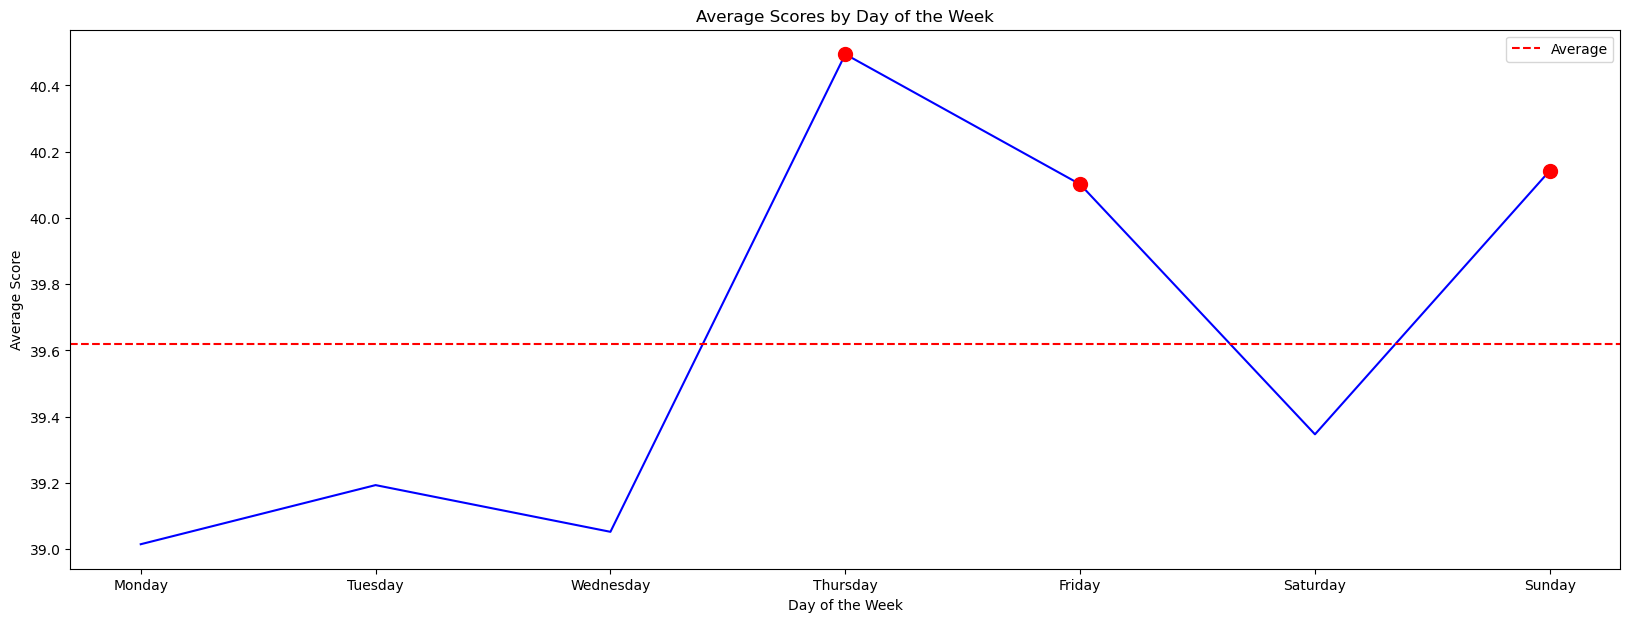

In [22]:
# Calculate average score per day of the week
daily_scores = Content_Data_Final.groupby(Content_Data_Final['Datetime'].dt.dayofweek)['Score'].mean()

# peak days 
peak_days = daily_scores[daily_scores > daily_scores.mean()].index

# line chart of daily scores
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(daily_scores.index, daily_scores, color='b')

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(7))
ax.set_xticklabels(day_labels)

# peak days with red markers
for day in peak_days:
    ax.plot(day, daily_scores[day], marker='o', markersize=10, color='r')

avg_line = ax.axhline(y=daily_scores.mean(), color='r', linestyle='--')

ax.set_title('Average Scores by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Score')

ax.legend([avg_line], ['Average'])

plt.show()

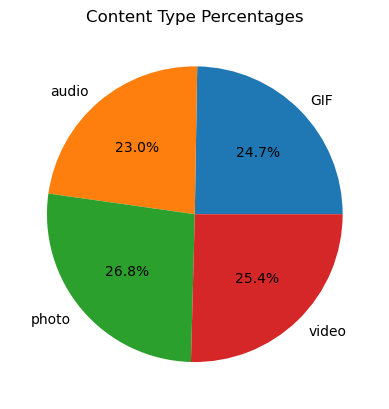

In [23]:
type_counts = Content_Data_Final.groupby('Content Type').size()

# pie chart
fig, ax = plt.subplots()
ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')

ax.set_title('Content Type Percentages')

plt.show()

In [24]:
num_categories = Content_Data_Final['Category'].nunique()
num_categories

16

In [25]:
category_counts = Content_Data_Final['Category'].value_counts()
category_counts

Animals            1897
Science            1796
Healthy eating     1717
Food               1699
Technology         1698
Culture            1676
Cooking            1664
Travel             1647
Soccer             1457
Education          1433
Fitness            1395
Studying           1363
Dogs               1338
Tennis             1328
Veganism           1248
Public speaking    1217
Name: Category, dtype: int64

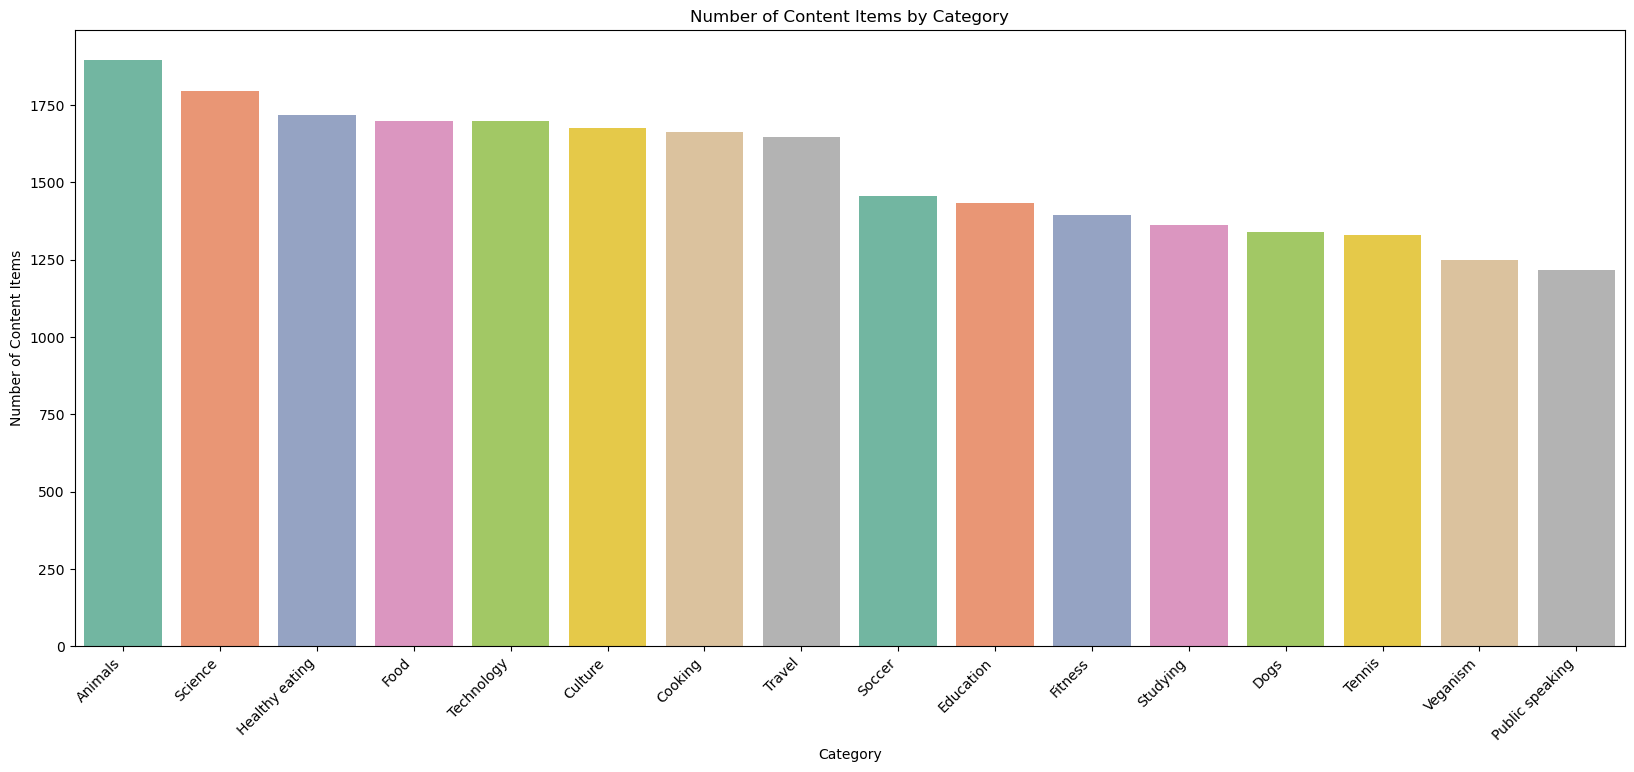

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=category_counts.index, y=category_counts, palette='Set2', ax=ax)

ax.set_title('Number of Content Items by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Content Items')

plt.xticks(rotation=45, ha='right')

plt.show()

In [27]:
Content_Data_Final['Month'] = Content_Data_Final['Datetime'].dt.month

# Get the month with the most posts
month_with_most_posts = Content_Data_Final['Month'].value_counts().idxmax()

print(f"The month with the most posts is: {month_with_most_posts}")

The month with the most posts is: 5


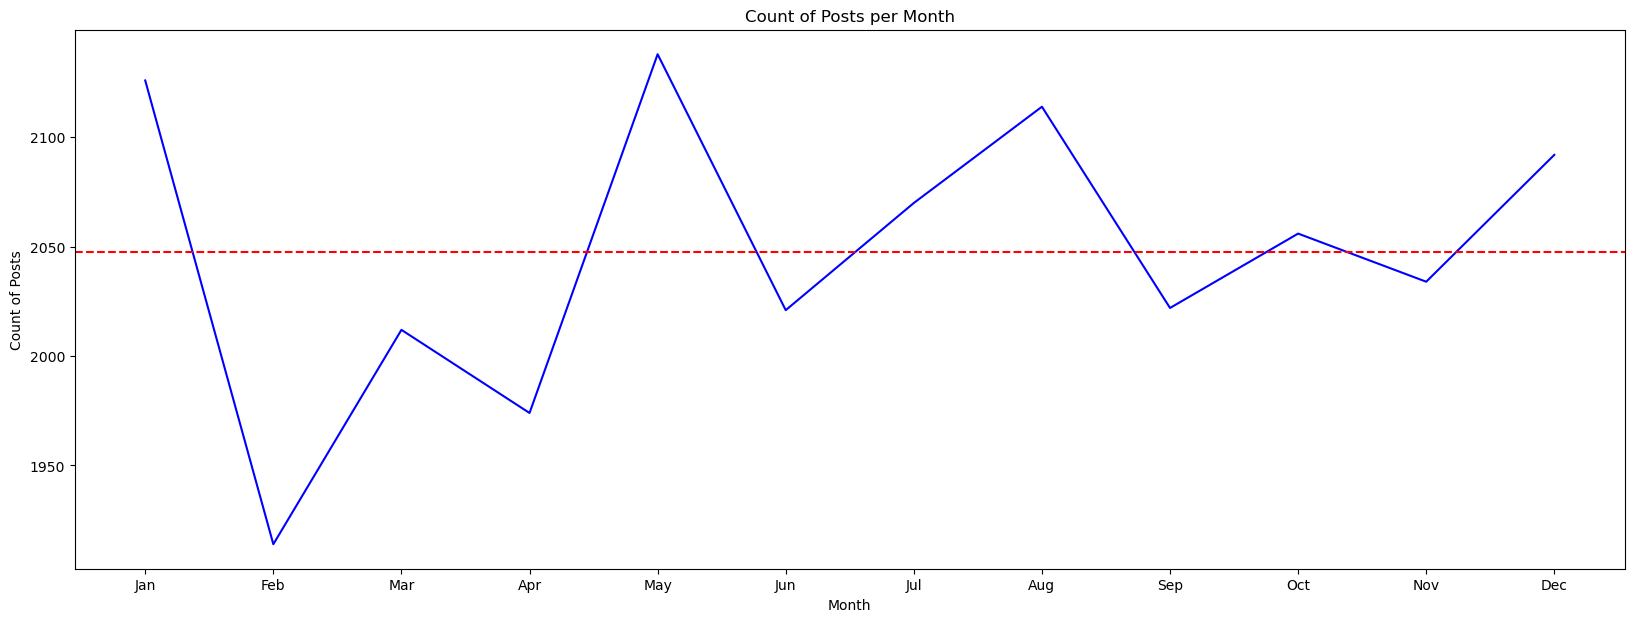

In [28]:
monthly_posts = Content_Data_Final.groupby('Month')['Content ID'].count()

# Calculate the average posts per month
avg_posts = monthly_posts.mean()


fig, ax = plt.subplots(figsize=(20,7))
ax.plot(monthly_posts.index, monthly_posts, color='b')

ax.axhline(y=avg_posts, color='r', linestyle='--')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_labels)

ax.set_title('Count of Posts per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count of Posts')

plt.show()